In [ ]:
# CIAI Challenge
# Owner     : Aagashram Neelakandan (67555), CMS, TUBAF
# Date      : 2024-05-26 21:27:36 CEST
# Purpose   : To analyse the given initial data 

### Step 1: Load the Dataset and Basic Exploration

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
# df = pd.read_csv('Training_Dataset_1.csv')
df = pd.read_csv('Training_Dataset_2.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display data types of each column
print(df.dtypes)

               t_stamp  P1_STATE  LIT101.Pv  FIT101.Pv  MV101.Status   
0  2024-04-23 09:15:00         1   548.8321        0.0             1  \
1  2024-04-23 09:15:01         1   548.8321        0.0             1   
2  2024-04-23 09:15:02         1   548.8321        0.0             1   
3  2024-04-23 09:15:03         1   548.8321        0.0             1   
4  2024-04-23 09:15:04         1   548.8321        0.0             1   

   P101.Status  P102.Status  P2_STATE  FIT201.Pv   AIT201.Pv  ...  FIT602.Pv   
0            1            1         1        0.0  230.197388  ...   1.017204  \
1            1            1         1        0.0  230.005127  ...   1.005511   
2            1            1         1        0.0  230.005127  ...   1.005511   
3            1            1         1        0.0  230.005127  ...   1.013200   
4            1            1         1        0.0  230.005127  ...   1.009515   

   P601.Status  P602.Status  P603.Status  LSH601.Alarm  LSL601.Alarm   
0            1

In [2]:
# Convert 'active' to 1 and 'inactive' to 0 across the entire DataFrame
df = df.applymap(lambda x: 1 if x == 'Active' else (0 if x == 'Inactive' else x))
df['LSL602.Alarm'] = df['LSL602.Alarm'].astype(np.int8)
df['LSH603.Alarm'] = df['LSH603.Alarm'].astype(np.int8)
df['LSL603.Alarm'] = df['LSL603.Alarm'].astype(np.int8)

print(df['LSL602.Alarm'].dtypes)


int8


In [3]:
df.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-04-23 09:15:00,1,548.8321,0.0,1,1,1,1,0.0,230.197388,...,1.017204,1,1,1,0,0,1,0,0,1
1,2024-04-23 09:15:01,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,0,0,1,0,0,1
2,2024-04-23 09:15:02,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,0,0,1,0,0,1
3,2024-04-23 09:15:03,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.013200,1,1,1,0,0,1,0,0,1
4,2024-04-23 09:15:04,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.009515,1,1,1,0,0,1,0,0,1


In [4]:
# Convert the 't_stamp' column to datetime format (if present)
if 't_stamp' in df.columns:
    df['t_stamp'] = pd.to_datetime(df['t_stamp'])
    
    # Calculate the time passed in seconds from the baseline (minimum t_stamp)
    min_t_stamp = df['t_stamp'].min()
    df['time_passed_seconds'] = (df['t_stamp'] - min_t_stamp).dt.total_seconds()
    
    #Converting it to float32
    df['time_passed_seconds'] = df['time_passed_seconds'].astype('float32')
    
    # Extract useful features from the t_stamp
    df['year'] = df['t_stamp'].dt.year
    df['month'] = df['t_stamp'].dt.month
    df['day'] = df['t_stamp'].dt.day
    df['hour'] = df['t_stamp'].dt.hour
    df['minute'] = df['t_stamp'].dt.minute
    df['second'] = df['t_stamp'].dt.second
    
    # Optionally, drop the original t_stamp column
    df = df.drop(columns=['t_stamp'])
    
    

In [5]:
df.tail()

,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,...,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm,time_passed_seconds,year,month,day,hour,minute,second
265495,2,676.2465,0.0,1,1,1,2,0.0,40.75878,8.432325,...,0,0,1,265495.0,2024,4,26,10,59,55
265496,2,676.2465,0.0,1,1,1,2,0.0,40.75878,8.451551,...,0,0,1,265496.0,2024,4,26,10,59,56
265497,2,676.2465,0.0,1,1,1,2,0.0,40.75878,8.470137,...,0,0,1,265497.0,2024,4,26,10,59,57
265498,2,676.2465,0.0,1,1,1,2,0.0,40.75878,8.489362,...,0,0,1,265498.0,2024,4,26,10,59,58
265499,2,676.2465,0.0,1,1,1,2,0.0,40.75878,8.504102,...,0,0,1,265499.0,2024,4,26,10,59,59


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265500 entries, 0 to 265499
Data columns (total 89 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   P1_STATE             265500 non-null  int64  
 1   LIT101.Pv            265500 non-null  float64
 2   FIT101.Pv            265500 non-null  float64
 3   MV101.Status         265500 non-null  int64  
 4   P101.Status          265500 non-null  int64  
 5   P102.Status          265500 non-null  int64  
 6   P2_STATE             265500 non-null  int64  
 7   FIT201.Pv            265500 non-null  float64
 8   AIT201.Pv            265500 non-null  float64
 9   AIT202.Pv            265500 non-null  float64
 10  AIT203.Pv            265500 non-null  float64
 11  MV201.Status         265500 non-null  int64  
 12  P201.Status          265500 non-null  int64  
 13  P202.Status          265500 non-null  int64  
 14  P203.Status          265500 non-null  int64  
 15  P204.Status      

In [7]:
df.describe()

,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,...,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm,time_passed_seconds,year,month,day,hour,minute,second
count,265500.000000,265500.000000,265500.000000,265500.000000,265500.000000,265500.0,265500.000000,265500.000000,265500.000000,265500.000000,...,265500.0,265500.0,265500.0,265500.000000,265500.0,265500.0,265500.000000,265500.000000,265500.000000,265500.000000
mean,1.999827,711.383658,0.416503,1.080734,1.405702,1.0,1.997748,1.071403,70.554319,9.118096,...,0.0,0.0,1.0,132749.500000,2024.0,4.0,24.423729,11.454237,29.576271,29.500000
std,0.074611,93.030561,1.361197,0.282166,0.491028,0.0,0.047406,1.293219,23.339695,0.442666,...,0.0,0.0,0.0,76643.390625,0.0,0.0,0.970820,6.846299,17.295932,17.318135
min,1.000000,488.814600,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,29.896181,7.457255,...,0.0,0.0,1.0,0.000000,2024.0,4.0,23.000000,0.000000,0.000000,0.000000
25%,2.000000,637.072266,0.000000,1.000000,1.000000,1.0,2.000000,0.000000,51.557293,8.769739,...,0.0,0.0,1.0,66374.750000,2024.0,4.0,24.000000,6.000000,15.000000,14.750000
50%,2.000000,730.690063,0.000000,1.000000,1.000000,1.0,2.000000,0.000000,67.162270,9.065176,...,0.0,0.0,1.0,132749.500000,2024.0,4.0,24.000000,11.000000,30.000000,29.500000
75%,2.000000,793.965500,0.000000,1.000000,2.000000,1.0,2.000000,2.637363,89.624460,9.523712,...,0.0,0.0,1.0,199124.250000,2024.0,4.0,25.000000,17.000000,45.000000,44.250000
max,3.000000,833.139800,5.009128,2.000000,2.000000,1.0,2.000000,2.728350,231.991791,9.995386,...,0.0,0.0,1.0,265499.000000,2024.0,4.0,26.000000,23.000000,59.000000,59.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

# Display data types of each column
print(df.dtypes)


if(np.sum(df.isnull().sum())):
    # Remove duplicate rows
    df = df.drop_duplicates()

    # Handle missing values (e.g., fill with mean)
    df = df.fillna(df.mean())

P1_STATE        0
LIT101.Pv       0
FIT101.Pv       0
MV101.Status    0
P101.Status     0
               ..
month           0
day             0
hour            0
minute          0
second          0
Length: 89, dtype: int64
P1_STATE          int64
LIT101.Pv       float64
FIT101.Pv       float64
MV101.Status      int64
P101.Status       int64
                 ...   
month             int32
day               int32
hour              int32
minute            int32
second            int32
Length: 89, dtype: object


In [9]:
# Normalize the data
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [10]:
df.tail()
df.describe()

,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,...,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm,time_passed_seconds,year,month,day,hour,minute,second
count,2.655000e+05,2.655000e+05,2.655000e+05,2.655000e+05,2.655000e+05,265500.0,2.655000e+05,2.655000e+05,2.655000e+05,2.655000e+05,...,265500.0,265500.0,265500.0,265500.000000,265500.0,265500.0,265500.000000,265500.000000,265500.000000,265500.000000
mean,9.855602e-16,-2.599168e-16,2.140995e-17,1.271751e-16,-1.447313e-16,0.0,1.491631e-15,4.453270e-17,-6.140374e-16,2.483554e-15,...,0.0,0.0,1.0,132749.500000,2024.0,4.0,24.423729,11.454237,29.576271,29.500000
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,0.0,0.0,0.0,76643.390625,0.0,0.0,0.970820,6.846299,17.295932,17.318135
min,-1.340050e+01,-2.392434e+00,-3.059834e-01,-3.830140e+00,-8.262317e-01,0.0,-2.104709e+01,-8.284797e-01,-1.742020e+00,-3.751913e+00,...,0.0,0.0,1.0,0.000000,2024.0,4.0,23.000000,0.000000,0.000000,0.000000
25%,2.322146e-03,-7.987862e-01,-3.059834e-01,-2.861242e-01,-8.262317e-01,0.0,4.751251e-02,-8.284797e-01,-8.139379e-01,-7.869540e-01,...,0.0,0.0,1.0,66374.750000,2024.0,4.0,24.000000,6.000000,15.000000,14.750000
50%,2.322146e-03,2.075279e-01,-3.059834e-01,-2.861242e-01,-8.262317e-01,0.0,4.751251e-02,-8.284797e-01,-1.453342e-01,-1.195489e-01,...,0.0,0.0,1.0,132749.500000,2024.0,4.0,24.000000,11.000000,30.000000,29.500000
75%,2.322146e-03,8.876868e-01,-3.059834e-01,-2.861242e-01,1.210314e+00,0.0,4.751251e-02,1.210903e+00,8.170706e-01,9.163040e-01,...,0.0,0.0,1.0,199124.250000,2024.0,4.0,25.000000,17.000000,45.000000,44.250000
max,1.340514e+01,1.308778e+00,3.373966e+00,3.257891e+00,1.210314e+00,0.0,4.751251e-02,1.281261e+00,6.916876e+00,1.981836e+00,...,0.0,0.0,1.0,265499.000000,2024.0,4.0,26.000000,23.000000,59.000000,59.000000


         PC1       PC2       PC3
0  80.462999  0.780404  1.451740
1  80.450181  0.777672  1.457710
2  80.446118  0.777387  1.450094
3  80.434041  0.777881  1.452212
4  80.434551  0.777276  1.447073
                PC1           PC2           PC3
count  2.655000e+05  2.655000e+05  2.655000e+05
mean   1.391647e-17 -1.010550e-16 -2.637706e-16
std    4.331860e+00  3.098000e+00  2.119091e+00
min   -1.468820e+00 -3.966675e+00 -8.330203e+00
25%   -5.134230e-01 -3.420342e+00 -1.341529e+00
50%   -2.634524e-01 -4.185256e-01  2.821424e-01
75%   -2.131090e-02  3.446714e+00  1.483226e+00
max    8.063815e+01  5.139250e+00  1.137866e+01


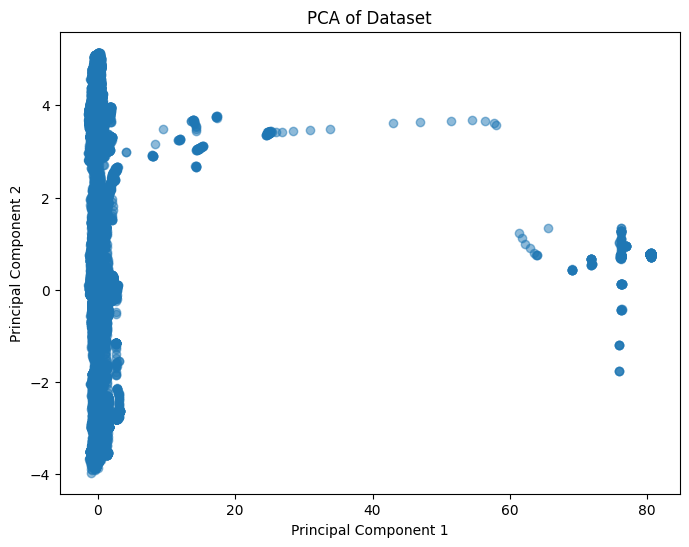

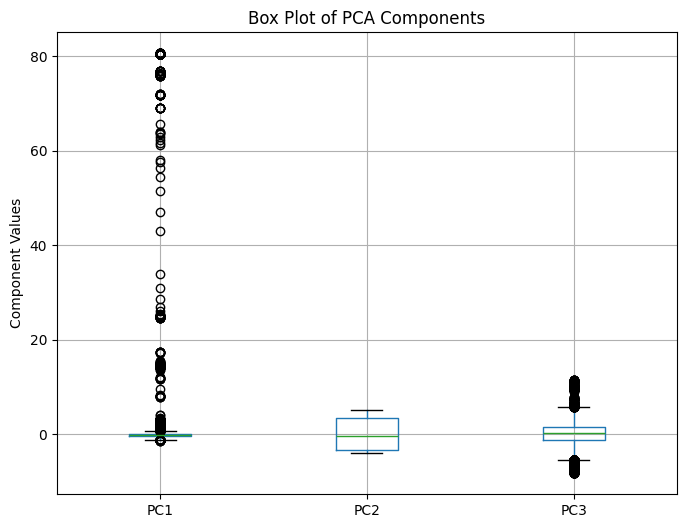

In [19]:
# Perform PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df[numeric_cols])

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the PCA components
print(pca_df.head())
print(pca_df.describe())

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

# Plotting box plot for PCA components
plt.figure(figsize=(8, 6))
pca_df.boxplot()
plt.title('Box Plot of PCA Components')
plt.ylabel('Component Values')
plt.show()

### Anomaly Detection
----------------------
#### Unsupervised Methods
1. Isolation Forest 

c:\Users\ASUS\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


        P1_STATE  LIT101.Pv  FIT101.Pv  MV101.Status  P101.Status   
0     -13.400499  -1.747295  -0.305983     -0.286124    -0.826232  \
1     -13.400499  -1.747295  -0.305983     -0.286124    -0.826232   
2     -13.400499  -1.747295  -0.305983     -0.286124    -0.826232   
3     -13.400499  -1.747295  -0.305983     -0.286124    -0.826232   
4     -13.400499  -1.747295  -0.305983     -0.286124    -0.826232   
...          ...        ...        ...           ...          ...   
11096   0.002322   0.903299   3.310908      3.257891     1.210314   
11097   0.002322   0.925661   3.315379      3.257891     1.210314   
11098   0.002322   0.926083   3.315379      3.257891     1.210314   
11099   0.002322   0.932412   3.315379      3.257891     1.210314   
11100   0.002322   0.948867   3.315379      3.257891     1.210314   

       P102.Status   P2_STATE  FIT201.Pv  AIT201.Pv  AIT202.Pv  ...   
0              0.0 -21.047088  -0.828480   6.839994  -3.118529  ...  \
1              0.0 -21.047088

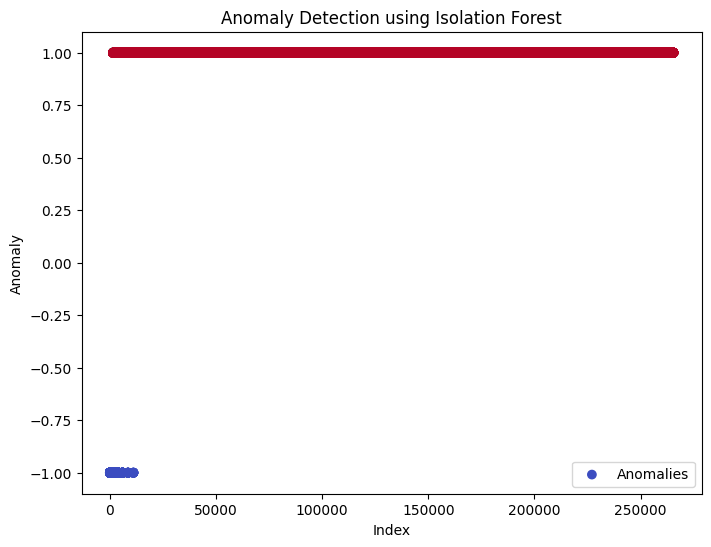

In [18]:
from sklearn.ensemble import IsolationForest

# Perform Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[numeric_cols])

# Anomaly column: -1 for anomalies, 1 for normal data points
anomalies = df[df['anomaly'] == -1]
print(anomalies)

# Visualize Anomalies
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['anomaly'], c=df['anomaly'], cmap='coolwarm', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Anomaly')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()

#### COMPARING THE PCA Value and Isolation Forest Value
Checking which columns are deviated and comparison between the columns

In [64]:
## Outliers from PCA Box plot
q1, q3 = np.percentile(pca_df['PC1'].to_numpy(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.array([x for x in pca_df['PC1'] if x < lower_bound or x > upper_bound])
print("Outliers Size:", outliers.shape)

visual_threshold = 15
visual_inspection_anomalies = np.array(pca_df[pca_df['PC1'] > visual_threshold])
print("visual_inspection_anomalies shape: ", visual_inspection_anomalies.shape)

## Getting Indices
outliers_indices = np.logical_or([pca_df['PC1'] < lower_bound],[pca_df['PC1'] > upper_bound])
visual_anomaly_indices = np.array([pca_df['PC1'] > visual_threshold])
isolation_forest_indices = np.array([df['anomaly'] == -1])

Outliers Size: (7679,)
visual_inspection_anomalies shape:  (853, 3)


In [65]:
# Comparing the Columns which are there for anomaly

## Less Conservative - All should be true
# less_conservative_indices = np.logical_and(outliers_indices,visual_anomaly_indices,isolation_forest_indices)
less_conservative_indices = np.logical_and(visual_anomaly_indices,isolation_forest_indices)

## Highly Conservative - Any one should be true
# highly_conservative_indices = np.logical_or(outliers_indices,visual_anomaly_indices,isolation_forest_indices)
highly_conservative_indices = np.logical_or(visual_anomaly_indices,isolation_forest_indices)

print("less_conservative_indices Shape: ",less_conservative_indices.nonzero()[0].shape)
print("highly_conservative_indices Shape: ",highly_conservative_indices.nonzero()[0].shape)


less_conservative_indices Shape:  (853,)
highly_conservative_indices Shape:  (2655,)


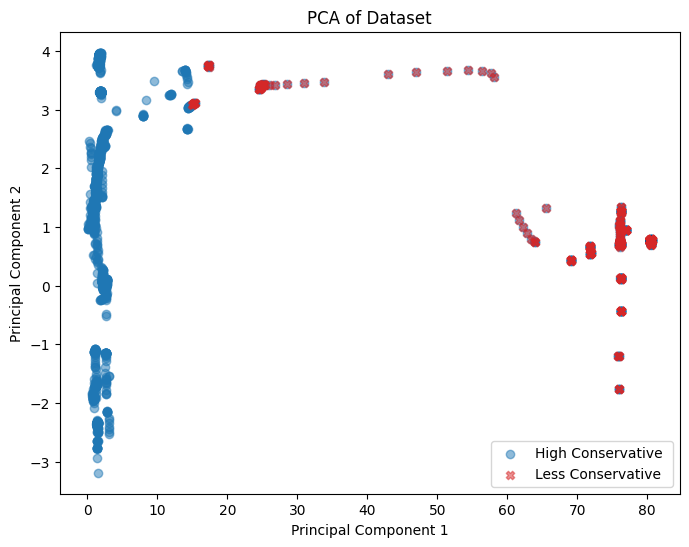

In [66]:
## Plotting the PCA with the Highly and Less conservative system
LC_pca_df = pca_df[less_conservative_indices[0]]
HC_pca_df = pca_df[highly_conservative_indices[0]]

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(HC_pca_df['PC1'], HC_pca_df['PC2'], alpha=0.5, color='tab:blue', label="High Conservative ")
plt.scatter(LC_pca_df['PC1'], LC_pca_df['PC2'], alpha=0.5, color='tab:red', marker='X', label='Less Conservative')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Dataset')
plt.show()